In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [6]:
from google.colab import files
files.upload()

Saving NDAQ_data.csv to NDAQ_data.csv


{'NDAQ_data.csv': b'date,open,high,low,close,volume,Name\n2013-02-08,29.4,29.49,29.142,29.47,863756,NDAQ\n2013-02-11,29.49,32.1499,29.32,30.38,6707438,NDAQ\n2013-02-12,31.33,31.65,29.93,30.55,3384949,NDAQ\n2013-02-13,30.44,31.7,30.44,31.65,3210667,NDAQ\n2013-02-14,31.51,31.51,30.41,30.6,5653021,NDAQ\n2013-02-15,30.56,31.8,30.52,31.07,2765531,NDAQ\n2013-02-19,31.24,31.565,31.1,31.49,1284990,NDAQ\n2013-02-20,31.38,31.515,30.99,31.05,1421161,NDAQ\n2013-02-21,31.03,31.24,30.75,30.98,1077725,NDAQ\n2013-02-22,31.04,31.44,31.03,31.36,1739962,NDAQ\n2013-02-25,31.52,31.78,30.82,30.83,1179368,NDAQ\n2013-02-26,31.14,31.73,31.055,31.45,1847858,NDAQ\n2013-02-27,31.25,31.88,31.25,31.79,1016758,NDAQ\n2013-02-28,31.8,31.9,31.624,31.66,1164248,NDAQ\n2013-03-01,31.6,31.7,31.18,31.58,1612926,NDAQ\n2013-03-04,31.44,32.05,31.31,32.03,1628374,NDAQ\n2013-03-05,32.08,32.83,32.08,32.45,1919001,NDAQ\n2013-03-06,32.45,32.79,32.165,32.23,1427761,NDAQ\n2013-03-07,32.3,32.3799,31.97,32.0,1431928,NDAQ\n2013-03-08,32

In [7]:
df = pd.read_csv('NDAQ_data.csv')

In [8]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,29.40,29.4900,29.142,29.47,863756,NDAQ
1,2013-02-11,29.49,32.1499,29.320,30.38,6707438,NDAQ
2,2013-02-12,31.33,31.6500,29.930,30.55,3384949,NDAQ
3,2013-02-13,30.44,31.7000,30.440,31.65,3210667,NDAQ
4,2013-02-14,31.51,31.5100,30.410,30.60,5653021,NDAQ


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [10]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,53.501271,53.960816,53.069671,53.540838,1.121027e+06
std,15.330522,15.388827,15.253870,15.323778,6.783181e+05
min,27.930000,28.110000,27.470000,27.910000,2.180330e+05
25%,39.240000,39.645000,38.735000,39.175000,7.351005e+05
50%,51.620000,51.940000,51.140000,51.730000,9.738160e+05
75%,67.635000,68.073000,67.230000,67.645000,1.325648e+06
max,82.050000,83.290000,81.370000,81.850000,1.144308e+07


In [11]:
df.shape

(1259, 7)

In [12]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [13]:
df.dropna(inplace=True)

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.sort_values('date', inplace=True)

In [16]:
summary_stats = df.describe()
print(summary_stats)

                                date         open         high          low  \
count                           1259  1259.000000  1259.000000  1259.000000   
mean   2015-08-09 05:44:16.393963264    53.501271    53.960816    53.069671   
min              2013-02-08 00:00:00    27.930000    28.110000    27.470000   
25%              2014-05-10 12:00:00    39.240000    39.645000    38.735000   
50%              2015-08-10 00:00:00    51.620000    51.940000    51.140000   
75%              2016-11-05 12:00:00    67.635000    68.073000    67.230000   
max              2018-02-07 00:00:00    82.050000    83.290000    81.370000   
std                              NaN    15.330522    15.388827    15.253870   

             close        volume  
count  1259.000000  1.259000e+03  
mean     53.540838  1.121027e+06  
min      27.910000  2.180330e+05  
25%      39.175000  7.351005e+05  
50%      51.730000  9.738160e+05  
75%      67.645000  1.325648e+06  
max      81.850000  1.144308e+07  
std     

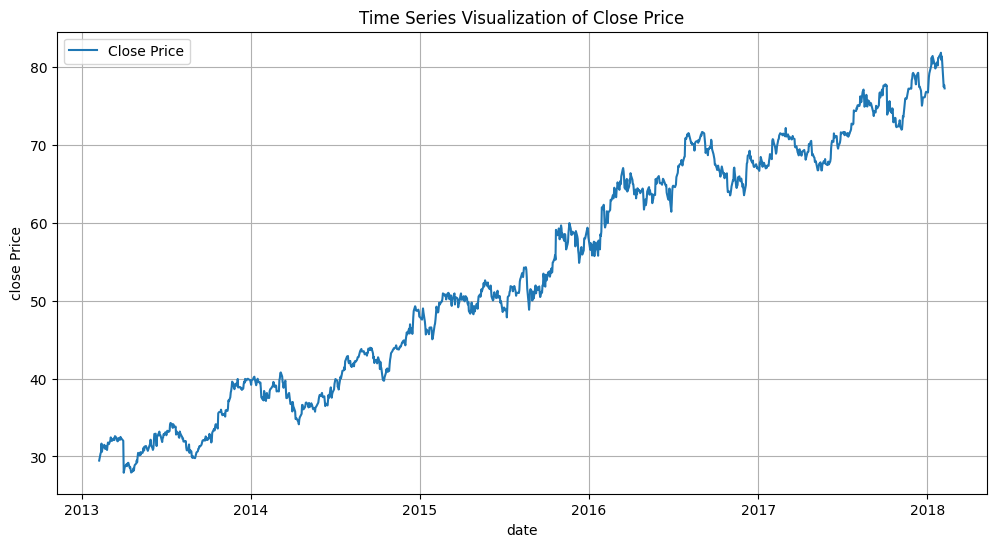

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.title('Time Series Visualization of Close Price')
plt.xlabel('date')
plt.ylabel('close Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
significant_events = [
    {'date': '2015-01-15', 'event': 'Earnings Announcement', 'impact': 'Positive'},
    {'date': '2016-03-10', 'event': 'Product Launch', 'impact': 'Positive'},
    {'date': '2018-06-20', 'event': 'Regulatory Investigation', 'impact': 'Negative'},

]


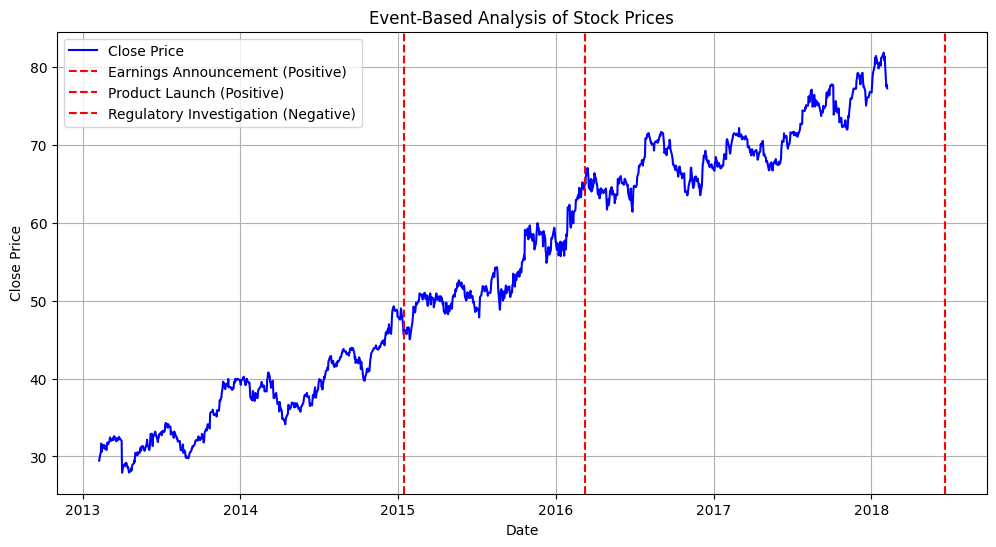

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['close'], label='Close Price', color='blue')

for event in significant_events:
    event_date = pd.to_datetime(event['date'])
    plt.axvline(event_date, linestyle='--', color='red', label=f"{event['event']} ({event['impact']})")

plt.title('Event-Based Analysis of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
lag_window = 2

for i in range(1, lag_window + 1):
  df[f'Close_lag_{i}'] = df['close'].shift(i)

  print(df)


           date   open     high     low  close   volume  Name  Close_lag_1
0    2013-02-08  29.40  29.4900  29.142  29.47   863756  NDAQ          NaN
1    2013-02-11  29.49  32.1499  29.320  30.38  6707438  NDAQ        29.47
2    2013-02-12  31.33  31.6500  29.930  30.55  3384949  NDAQ        30.38
3    2013-02-13  30.44  31.7000  30.440  31.65  3210667  NDAQ        30.55
4    2013-02-14  31.51  31.5100  30.410  30.60  5653021  NDAQ        31.65
...         ...    ...      ...     ...    ...      ...   ...          ...
1254 2018-02-01  80.31  82.1600  80.150  81.37  1277925  NDAQ        80.91
1255 2018-02-02  81.04  81.8000  80.280  80.34  1496022  NDAQ        81.37
1256 2018-02-05  79.59  80.9800  77.200  77.47  2095712  NDAQ        80.34
1257 2018-02-06  74.91  78.0100  72.980  77.72  2973839  NDAQ        77.47
1258 2018-02-07  77.52  78.6500  77.240  77.27  1454143  NDAQ        77.72

[1259 rows x 8 columns]
           date   open     high     low  close   volume  Name  Close_lag_1 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1259 non-null   datetime64[ns]
 1   open         1259 non-null   float64       
 2   high         1259 non-null   float64       
 3   low          1259 non-null   float64       
 4   close        1259 non-null   float64       
 5   volume       1259 non-null   int64         
 6   Name         1259 non-null   object        
 7   Close_lag_1  1258 non-null   float64       
 8   Close_lag_2  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 88.7+ KB


In [22]:
df.head()

,date,open,high,low,close,volume,Name,Close_lag_1,Close_lag_2
0,2013-02-08,29.40,29.4900,29.142,29.47,863756,NDAQ,NaN,NaN
1,2013-02-11,29.49,32.1499,29.320,30.38,6707438,NDAQ,29.47,NaN
2,2013-02-12,31.33,31.6500,29.930,30.55,3384949,NDAQ,30.38,29.47
3,2013-02-13,30.44,31.7000,30.440,31.65,3210667,NDAQ,30.55,30.38
4,2013-02-14,31.51,31.5100,30.410,30.60,5653021,NDAQ,31.65,30.55


In [23]:
df['SMA_10'] = df['close'].rolling(window=10).mean()
print(df)

           date   open     high     low  close   volume  Name  Close_lag_1  \
0    2013-02-08  29.40  29.4900  29.142  29.47   863756  NDAQ          NaN   
1    2013-02-11  29.49  32.1499  29.320  30.38  6707438  NDAQ        29.47   
2    2013-02-12  31.33  31.6500  29.930  30.55  3384949  NDAQ        30.38   
3    2013-02-13  30.44  31.7000  30.440  31.65  3210667  NDAQ        30.55   
4    2013-02-14  31.51  31.5100  30.410  30.60  5653021  NDAQ        31.65   
...         ...    ...      ...     ...    ...      ...   ...          ...   
1254 2018-02-01  80.31  82.1600  80.150  81.37  1277925  NDAQ        80.91   
1255 2018-02-02  81.04  81.8000  80.280  80.34  1496022  NDAQ        81.37   
1256 2018-02-05  79.59  80.9800  77.200  77.47  2095712  NDAQ        80.34   
1257 2018-02-06  74.91  78.0100  72.980  77.72  2973839  NDAQ        77.47   
1258 2018-02-07  77.52  78.6500  77.240  77.27  1454143  NDAQ        77.72   

      Close_lag_2   SMA_10  
0             NaN      NaN  
1    

In [24]:
df['EMA_10'] = df['close'].ewm(span=10, adjust=False).mean()

In [25]:
df['Rolling_STD_10'] = df['close'].rolling(window=10).std()

In [26]:
df['Rolling_Volume_Sum_10'] = df['volume'].rolling(window=10).sum()

In [27]:
print(df)

           date   open     high     low  close   volume  Name  Close_lag_1  \
0    2013-02-08  29.40  29.4900  29.142  29.47   863756  NDAQ          NaN   
1    2013-02-11  29.49  32.1499  29.320  30.38  6707438  NDAQ        29.47   
2    2013-02-12  31.33  31.6500  29.930  30.55  3384949  NDAQ        30.38   
3    2013-02-13  30.44  31.7000  30.440  31.65  3210667  NDAQ        30.55   
4    2013-02-14  31.51  31.5100  30.410  30.60  5653021  NDAQ        31.65   
...         ...    ...      ...     ...    ...      ...   ...          ...   
1254 2018-02-01  80.31  82.1600  80.150  81.37  1277925  NDAQ        80.91   
1255 2018-02-02  81.04  81.8000  80.280  80.34  1496022  NDAQ        81.37   
1256 2018-02-05  79.59  80.9800  77.200  77.47  2095712  NDAQ        80.34   
1257 2018-02-06  74.91  78.0100  72.980  77.72  2973839  NDAQ        77.47   
1258 2018-02-07  77.52  78.6500  77.240  77.27  1454143  NDAQ        77.72   

      Close_lag_2   SMA_10     EMA_10  Rolling_STD_10  Rolling_

In [28]:
df['Volume_Change'] = df['volume'].pct_change() * 100

In [29]:
df['Volume_Ratio'] = df['volume'] / df['volume'].rolling(window=10).mean()

In [30]:
short_term_ma = df['volume'].rolling(window=10).mean()
long_term_ma = df['volume'].rolling(window=30).mean()
df['Volume_Oscillator'] = (short_term_ma - long_term_ma) / long_term_ma

In [31]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df['close'])


In [32]:
window = 20
df['SMA'] = df['close'].rolling(window=window).mean()
df['Upper_Band'] = df['SMA'] + 2 * df['close'].rolling(window=window).std()
df['Lower_Band'] = df['SMA'] - 2 * df['close'].rolling(window=window).std()

In [33]:
df['OBV'] = (df['volume'] * ((df['close'] - df['close'].shift(1)) > 0)).cumsum()

In [34]:
print(df)

           date   open     high     low  close   volume  Name  Close_lag_1  \
0    2013-02-08  29.40  29.4900  29.142  29.47   863756  NDAQ          NaN   
1    2013-02-11  29.49  32.1499  29.320  30.38  6707438  NDAQ        29.47   
2    2013-02-12  31.33  31.6500  29.930  30.55  3384949  NDAQ        30.38   
3    2013-02-13  30.44  31.7000  30.440  31.65  3210667  NDAQ        30.55   
4    2013-02-14  31.51  31.5100  30.410  30.60  5653021  NDAQ        31.65   
...         ...    ...      ...     ...    ...      ...   ...          ...   
1254 2018-02-01  80.31  82.1600  80.150  81.37  1277925  NDAQ        80.91   
1255 2018-02-02  81.04  81.8000  80.280  80.34  1496022  NDAQ        81.37   
1256 2018-02-05  79.59  80.9800  77.200  77.47  2095712  NDAQ        80.34   
1257 2018-02-06  74.91  78.0100  72.980  77.72  2973839  NDAQ        77.47   
1258 2018-02-07  77.52  78.6500  77.240  77.27  1454143  NDAQ        77.72   

      Close_lag_2   SMA_10  ...  Rolling_STD_10  Rolling_Volume

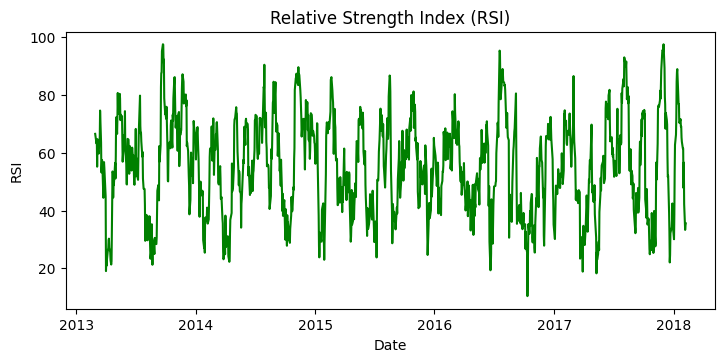

In [35]:
plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 2)
plt.plot(df['date'], df['RSI_14'], color='green')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.tight_layout()
plt.show()


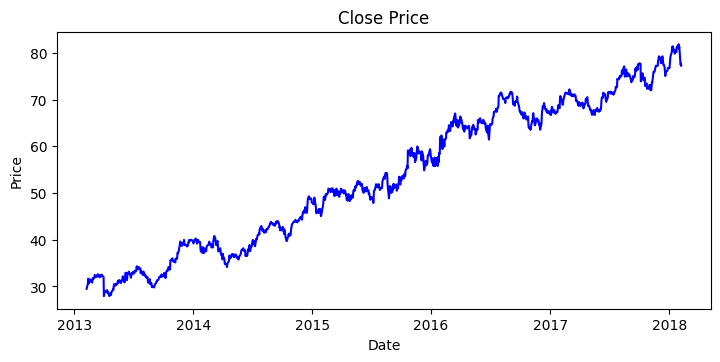

In [36]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(df['date'], df['close'], color='blue')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

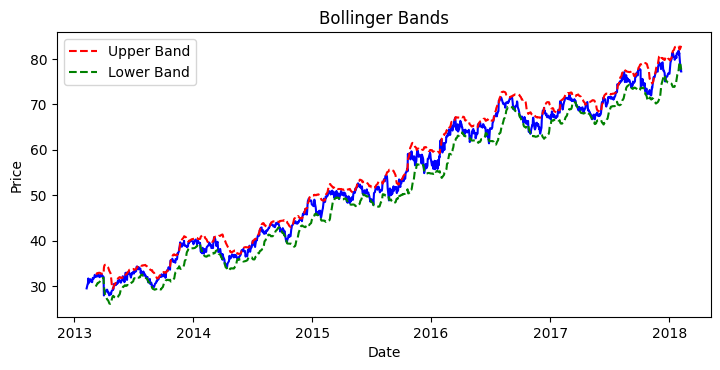

In [37]:
plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 4)
plt.plot(df['date'], df['close'], color='blue')
plt.plot(df['date'], df['Upper_Band'], color='red', linestyle='--', label='Upper Band')
plt.plot(df['date'], df['Lower_Band'], color='green', linestyle='--', label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


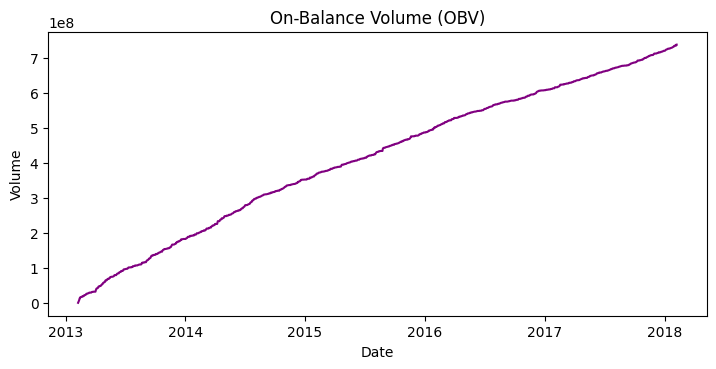

In [38]:
plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 6)
plt.plot(df['date'], df['OBV'], color='purple')
plt.title('On-Balance Volume (OBV)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1259 non-null   datetime64[ns]
 1   open                   1259 non-null   float64       
 2   high                   1259 non-null   float64       
 3   low                    1259 non-null   float64       
 4   close                  1259 non-null   float64       
 5   volume                 1259 non-null   int64         
 6   Name                   1259 non-null   object        
 7   Close_lag_1            1258 non-null   float64       
 8   Close_lag_2            1257 non-null   float64       
 9   SMA_10                 1250 non-null   float64       
 10  EMA_10                 1259 non-null   float64       
 11  Rolling_STD_10         1250 non-null   float64       
 12  Rolling_Volume_Sum_10  1250 non-null   float64       
 13  Vol

In [40]:
X = df[['volume', 'Volume_Change', 'Volume_Oscillator', 'RSI_14', 'SMA', 'SMA_10', 'open', 'high', 'low' ]]
y = df['close']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [44]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [48]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)



In [49]:
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

Training Set Metrics:
Mean Squared Error (MSE): 0.07076469854616008
Root Mean Squared Error (RMSE): 0.2660163501481818

Testing Set Metrics:
Mean Squared Error (MSE): 0.07076469854616008
Root Mean Squared Error (RMSE): 0.2660163501481818


In [50]:
print("\nPredicted Stock Prices for Testing Set:")
print(y_pred_test[:100])


Predicted Stock Prices for Testing Set:
[32.18903443 70.9802636  28.96212385 52.4457737  49.53962555 33.15423962
 69.13355784 77.10976311 65.58653647 44.65391663 30.45531403 67.7033513
 39.17014391 50.56558493 69.44760427 53.26307824 43.07024582 63.22968859
 40.62386388 65.30716698 65.98018057 50.90399687 52.54200412 65.1609913
 75.12188689 51.34313305 38.53274378 31.69444847 49.82930092 37.07365552
 42.33251055 66.07288466 57.67953185 63.58445034 70.42467217 64.60905379
 55.90606309 68.85738803 62.81827435 49.81932912 52.0101386  36.00137921
 42.81907195 38.79336384 69.25160571 30.87715525 40.95436173 43.64823512
 36.65544089 39.06628311 79.84334315 52.81703089 27.9852028  67.83588235
 50.73786542 81.06455556 72.51175284 39.82318026 71.91390104 62.98760277
 32.67290828 38.87368171 42.14715692 67.56350979 51.2246404  43.88752596
 40.13302154 78.2110389  30.45302096 62.51640661 38.52277612 51.95908806
 49.20251697 61.40410405 27.77451943 34.07396285 63.15247167 41.29055611
 37.33958316

In [51]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])



In [52]:
pipeline.fit(X_train, y_train)
predicted_prices = pipeline.predict(X_test)



In [53]:
print(predicted_prices)

[32.18903443 70.9802636  28.96212385 52.4457737  49.53962555 33.15423962
 69.13355784 77.10976311 65.58653647 44.65391663 30.45531403 67.7033513
 39.17014391 50.56558493 69.44760427 53.26307824 43.07024582 63.22968859
 40.62386388 65.30716698 65.98018057 50.90399687 52.54200412 65.1609913
 75.12188689 51.34313305 38.53274378 31.69444847 49.82930092 37.07365552
 42.33251055 66.07288466 57.67953185 63.58445034 70.42467217 64.60905379
 55.90606309 68.85738803 62.81827435 49.81932912 52.0101386  36.00137921
 42.81907195 38.79336384 69.25160571 30.87715525 40.95436173 43.64823512
 36.65544089 39.06628311 79.84334315 52.81703089 27.9852028  67.83588235
 50.73786542 81.06455556 72.51175284 39.82318026 71.91390104 62.98760277
 32.67290828 38.87368171 42.14715692 67.56350979 51.2246404  43.88752596
 40.13302154 78.2110389  30.45302096 62.51640661 38.52277612 51.95908806
 49.20251697 61.40410405 27.77451943 34.07396285 63.15247167 41.29055611
 37.33958316 40.46335827 71.99681989 42.29594333 64.3

In [54]:
score = mean_absolute_error(y_test, predicted_prices)
print(f'Mean Absolute Error (MAE): {score}')

Mean Absolute Error (MAE): 0.21234068775691717


In [55]:
results_df = pd.DataFrame({
    'Actual Prices': y_test,
    'Predicted Prices': predicted_prices
})

In [56]:
print(results_df.head())

      Actual Prices  Predicted Prices
76            32.15         32.189034
1026          70.73         70.980264
43            29.18         28.962124
666           52.62         52.445774
529           49.52         49.539626


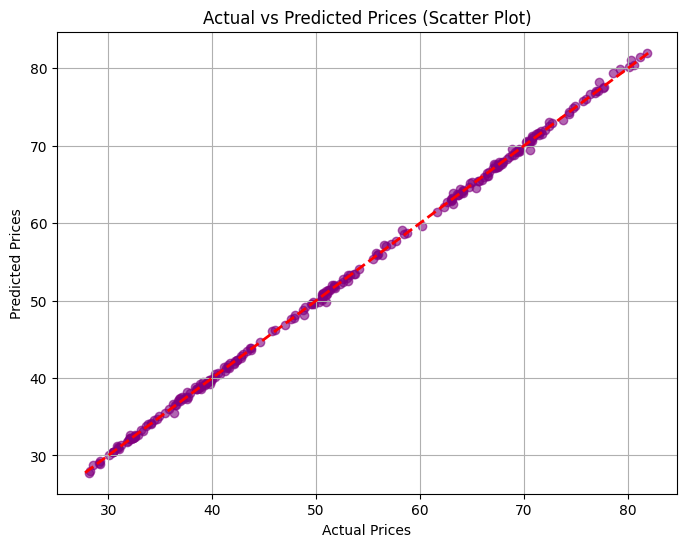

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(results_df['Actual Prices'], results_df['Predicted Prices'], color='purple', alpha=0.6)

min_price = min(results_df['Actual Prices'].min(), results_df['Predicted Prices'].min())
max_price = max(results_df['Actual Prices'].max(), results_df['Predicted Prices'].max())
plt.plot([min_price, max_price], [min_price, max_price], 'r--', lw=2)

plt.title('Actual vs Predicted Prices (Scatter Plot)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)


plt.savefig('actual_vs_predicted_scatter.png', dpi=300)


plt.show()

